In [1]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')



In [2]:
def historical_data(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    df.index = pd.to_datetime(df.timestamp)
    df = df[['adjusted_close']]
    df.columns = [ticker]
    df.dropna(inplace = True)
    return df


def multiple_tickers(tickers, df):
    for ticker in tickers:
        temp_df = historical_data(ticker)
        df = df.join(temp_df, how = "left")
        df.dropna(inplace = True)
        df = df.sort_index()
    df = df.loc[~(df==0).all(axis=1)]
    return df

In [3]:
SPY = historical_data("CM.TO")
banks = multiple_tickers(["BMO.TO","RY.TO","ZPR.TO"],SPY)
perf = banks.calc_stats()

C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))
C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [4]:
perf.display()

Stat                 CM.TO       BMO.TO      RY.TO       ZPR.TO
-------------------  ----------  ----------  ----------  ----------
Start                2012-11-26  2012-11-26  2012-11-26  2012-11-26
End                  2018-07-25  2018-07-25  2018-07-25  2018-07-25
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         94.87%      126.44%     119.37%     0.74%
Daily Sharpe         -           -           -           0.06
Daily Sortino        inf         inf         inf         0.10
CAGR                 12.51%      15.54%      14.89%      0.13%
Max Drawdown         -100.00%    -100.00%    -100.00%    -37.00%
Calmar Ratio         0.13        0.16        0.15        0.00

MTD                  2.59%       2.20%       2.86%       0.78%
3m                   5.86%       7.96%       5.39%       2.32%
6m                   -2.65%      2.17%       -2.57%      -0.15%
YTD                  -3.13%      5.22%       1.88%       1.30%
1Y                   12.90%      12.4

In [5]:
perf['RY.TO'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2012   0      0      0      0      0      0      0      0      0      0      1.64   1.66   3.33
  2013   4.76   3.06  -4.4    0.35   1.23  -0.41   5.71   1.15   1.69   7.12   0.6    1.38  24.05
  2014  -2.58   4.38   1.31   1.33   2.04   2.2    6.44   0.37  -0.89   0.9    3.94  -3.51  16.64
  2015  -9.71   9.16  -2.64   6.08  -1.3   -3.4    0.86  -3.83   0.61   2.41   1.75  -2.54  -3.81
  2016  -0.99  -4.8    8.34   5.21   1.17  -3.16   5.32   2.44  -0.33   4.15   3.91   4.35  27.84
  2017   3.88   3.12   0.42  -2.65  -0.11   0.85  -0.31  -0.35   4.16   5.42  -0.02   1.78  17.12
  2018   4.37  -4.02  -1.55  -0.94   0.37   1.01   2.86   0      0      0      0      0      1.88


In [6]:
returns = banks.to_log_returns().dropna()

C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))


<module 'matplotlib.pyplot' from 'C:\\Users\\xexx\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

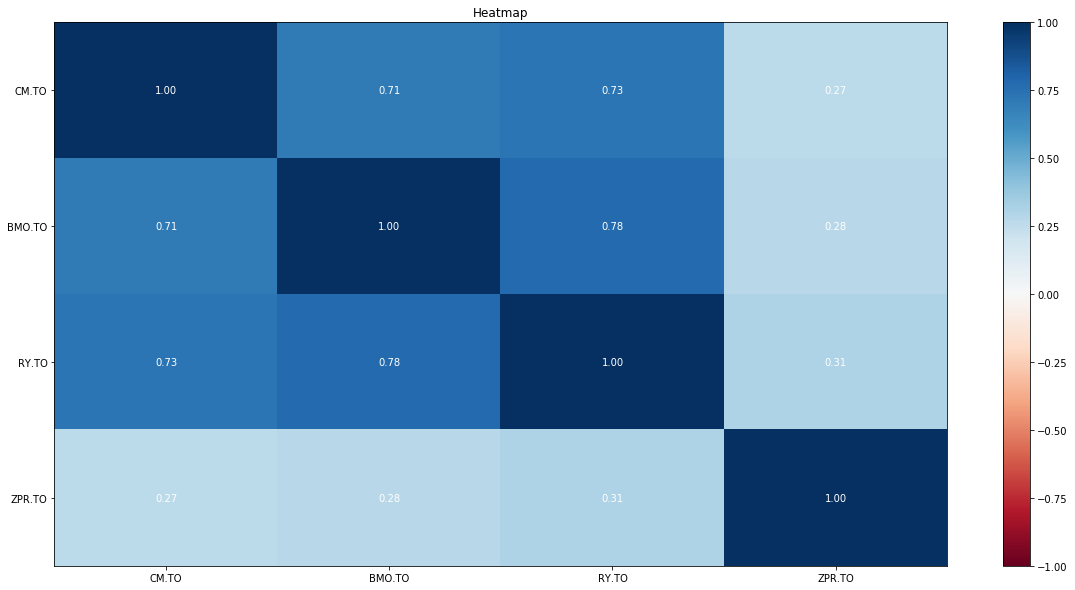

In [7]:
returns.plot_corr_heatmap(figsize=(20,10))

In [8]:
def historical_data1(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    df.index = pd.to_datetime(df.timestamp)
    df.dropna(inplace = True)
    return df

In [9]:
ZPR = historical_data1("ZPR.TO")
CPD = historical_data1("CPD.TO")

In [10]:
ZPR.adjusted_close.calc_stats().display()

Stats for adjusted_close from 2018-07-26 00:00:00 - 2012-11-26 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-0.99%              0.07  0.18%   -37.00%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y    incep.
-----  -----  -----  -----  -----  -----  -----  -----  --------
1.03%  2.60%  0.11%  1.56%  5.10%  5.46%  0.50%  0.18%  0.18%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.07     0.07       0.06
mean    0.62%    0.83%      0.68%
vol     9.46%    11.03%     11.79%
skew    0.67     -1.01      -1.13
kurt    12.57    6.19       1.99
best    4.73%    10.16%     14.55%
worst   -3.48%   -13.98%    -20.16%

Drawdowns:
max      avg       # days
-------  ------  --------
-37.00%  -2.81%    142.93

Misc:
---------------  ------
avg. up month    1.84%
avg. down month  -2.31%
up year %        66.67%
12m up %       

C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


In [11]:
CPD.adjusted_close.calc_stats().display()

Stats for adjusted_close from 2018-07-26 00:00:00 - 2007-10-25 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
-23.33%         -         2.50%   -100.00%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y    incep.
-----  -----  -----  -----  -----  -----  -----  -----  --------
0.99%  2.56%  0.01%  1.20%  4.70%  5.16%  1.75%  3.41%  2.50%

Periodic:
        daily     monthly    yearly
------  --------  ---------  --------
sharpe  -         0.33       0.26
mean    inf%      2.96%      3.05%
vol     -         8.89%      11.83%
skew    -         -0.76      -0.24
kurt    -         5.07       0.55
best    inf%      8.98%      24.60%
worst   -100.00%  -10.78%    -16.79%

Drawdowns:
max       avg       # days
--------  ------  --------
-100.00%  -2.09%     36.05

Misc:
---------------  ------
avg. up month    1.58%
avg. down month  -1.86%
up year %        72.73%
12

C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))
C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


In [12]:
MA = historical_data1("MA")
MA.adjusted_close.calc_stats().display()

Stats for adjusted_close from 2018-07-26 00:00:00 - 2006-05-25 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-97.91%              1.1  37.44%  -62.66%

Annualized Returns:
mtd    3m      6m      ytd     1y      3y      5y      10y     incep.
-----  ------  ------  ------  ------  ------  ------  ------  --------
6.33%  17.29%  22.86%  38.48%  60.26%  31.23%  29.26%  24.07%  37.44%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.10     1.21       0.83
mean    37.70%   36.84%     36.13%
vol     34.36%   30.46%     43.37%
skew    0.79     0.60       0.28
kurt    10.39    3.10       -0.25
best    20.85%   37.31%     119.40%
worst   -11.79%  -26.89%    -33.39%

Drawdowns:
max      avg       # days
-------  ------  --------
-62.66%  -3.67%     24.36

Misc:
---------------  ------
avg. up month    7.64%
avg. down month  -4.94%
up year %      

C:\Users\xexx\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


In [1]:
df = historical_data1("V")
df.adjusted_close.calc_stats().display()

NameError: name 'historical_data1' is not defined